In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df= pd.read_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Dataset District\\NASA\\warangal_nasa.csv")  #creating pandas dataframe

In [7]:
df

,Date,temp_max,rainfall,pressure
0,01/01/1991,30.46,0.01,97.55
1,02/01/1991,30.76,0.35,97.51
2,03/01/1991,26.81,0.04,97.72
3,04/01/1991,28.19,0.00,97.89
4,05/01/1991,28.84,0.00,97.88
...,...,...,...,...
11683,27/12/2022,28.14,0.94,98.00
11684,28/12/2022,28.68,2.55,98.04
11685,29/12/2022,28.02,0.06,98.19
11686,30/12/2022,28.63,0.00,98.23


In [8]:
df=df.drop(["pressure"], axis=1)   

In [16]:
df.describe()

,temp_max,rainfall
count,11688.000000,11688.000000
mean,33.472664,2.481171
std,5.059059,6.882148
min,20.870000,0.000000
25%,29.650000,0.000000
50%,31.940000,0.030000
75%,37.160000,1.590000
max,47.250000,174.670000


In [9]:
df['Date']= pd.to_datetime(df.Date, format="%d/%m/%Y")
df= df.set_index('Date')

In [10]:
print(pd.infer_freq(df.index))

D


In [11]:
df['rainfall']=df['rainfall']/175
df['temp_max']=df['temp_max']/50

In [12]:
df1=df[['temp_max', 'rainfall']]

In [21]:
df1=df1[:10958]

In [22]:
df1

,temp_max,rainfall
Date,,
1991-01-01,0.6092,0.000057
1991-01-02,0.6152,0.002000
1991-01-03,0.5362,0.000229
1991-01-04,0.5638,0.000000
1991-01-05,0.5768,0.000000
...,...,...
2020-12-27,0.5250,0.000000
2020-12-28,0.5212,0.000000
2020-12-29,0.5254,0.000000


In [23]:
def create_data(df, lookback=365):
    df_np= df.to_numpy()
    X=[]
    y=[]
    
    for i in range(len(df_np)-2*lookback):
        row = [x for x in df_np[i:i+lookback]]
        X.append(row)
        label = [z[0] for z in df_np[i+lookback:i+(2*lookback)]]
        y.append(label)
    return np.array(X), np.array(y)

In [24]:
X,y = create_data(df1)

In [25]:
X.shape, y.shape

((10228, 365, 2), (10228, 365))

In [26]:
X_train, y_train, X_test, y_test = X[:9265], y[:9265], X[9265:], y[9265:]
X_train, y_train, X_val, y_val= X_train[:8242], y_train[:8242], X_train[8242:9265], y_train[8242:9265]

In [27]:
len(X_train), len(X_val), len(X_test)

(9133, 730, 365)

In [28]:
X_train.shape, y_train.shape

((9133, 365, 2), (9133, 365))

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.optimizers import Adam

In [30]:
from tensorflow.keras.metrics import MeanAbsolutePercentageError

In [49]:
# Preparing LSTM layer
warangal_temp= Sequential([
    InputLayer((365,2)),
    LSTM(units=128),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dense(365, activation='relu'),  
])
warangal_temp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               67072     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               66048     
                                                                 
 dense_3 (Dense)             (None, 365)               187245    
                                                                 
Total params: 320,365
Trainable params: 320,365
Non-trainable params: 0
_________________________________________________________________


In [50]:
warangal_cp1= ModelCheckpoint('warangal_temp1/', save_best_only=True)
warangal_temp.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(),
    metrics=[MeanAbsolutePercentageError()]
)
epochs=200
history=warangal_temp.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=epochs, callbacks=[warangal_cp1])

Epoch 1/200
285/286 [============================>.] - ETA: 0s - loss: 0.0685 - mean_absolute_percentage_error: 24.4004

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 24s 76ms/step - loss: 0.0685 - mean_absolute_percentage_error: 24.3950 - val_loss: 0.0523 - val_mean_absolute_percentage_error: 18.5736
Epoch 2/200
285/286 [============================>.] - ETA: 0s - loss: 0.0495 - mean_absolute_percentage_error: 18.5226

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 21s 74ms/step - loss: 0.0495 - mean_absolute_percentage_error: 18.5168 - val_loss: 0.0402 - val_mean_absolute_percentage_error: 14.7963
Epoch 3/200
286/286 [==============================] - ETA: 0s - loss: 0.0336 - mean_absolute_percentage_error: 13.2135

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 21s 73ms/step - loss: 0.0336 - mean_absolute_percentage_error: 13.2135 - val_loss: 0.0288 - val_mean_absolute_percentage_error: 11.7765
Epoch 4/200
286/286 [==============================] - ETA: 0s - loss: 0.0265 - mean_absolute_percentage_error: 11.1032

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 21s 72ms/step - loss: 0.0265 - mean_absolute_percentage_error: 11.1032 - val_loss: 0.0258 - val_mean_absolute_percentage_error: 11.0054
Epoch 5/200
285/286 [============================>.] - ETA: 0s - loss: 0.0249 - mean_absolute_percentage_error: 10.5975

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 22s 75ms/step - loss: 0.0249 - mean_absolute_percentage_error: 10.5973 - val_loss: 0.0242 - val_mean_absolute_percentage_error: 10.1941
Epoch 6/200
285/286 [============================>.] - ETA: 0s - loss: 0.0238 - mean_absolute_percentage_error: 10.3048

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 22s 76ms/step - loss: 0.0238 - mean_absolute_percentage_error: 10.3043 - val_loss: 0.0226 - val_mean_absolute_percentage_error: 9.5443
Epoch 7/200
286/286 [==============================] - ETA: 0s - loss: 0.0224 - mean_absolute_percentage_error: 9.9413

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 21s 75ms/step - loss: 0.0224 - mean_absolute_percentage_error: 9.9413 - val_loss: 0.0214 - val_mean_absolute_percentage_error: 9.1978
Epoch 8/200
285/286 [============================>.] - ETA: 0s - loss: 0.0214 - mean_absolute_percentage_error: 9.6681

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 21s 74ms/step - loss: 0.0214 - mean_absolute_percentage_error: 9.6682 - val_loss: 0.0211 - val_mean_absolute_percentage_error: 8.9451
Epoch 9/200
285/286 [============================>.] - ETA: 0s - loss: 0.0201 - mean_absolute_percentage_error: 9.4004

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 22s 76ms/step - loss: 0.0201 - mean_absolute_percentage_error: 9.4008 - val_loss: 0.0202 - val_mean_absolute_percentage_error: 9.2863
Epoch 10/200
285/286 [============================>.] - ETA: 0s - loss: 0.0189 - mean_absolute_percentage_error: 9.1903

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 21s 73ms/step - loss: 0.0189 - mean_absolute_percentage_error: 9.1895 - val_loss: 0.0178 - val_mean_absolute_percentage_error: 8.6227
Epoch 11/200
285/286 [============================>.] - ETA: 0s - loss: 0.0175 - mean_absolute_percentage_error: 8.7969

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 21s 73ms/step - loss: 0.0175 - mean_absolute_percentage_error: 8.7975 - val_loss: 0.0177 - val_mean_absolute_percentage_error: 8.4639
Epoch 12/200
285/286 [============================>.] - ETA: 0s - loss: 0.0164 - mean_absolute_percentage_error: 8.5991

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 22s 75ms/step - loss: 0.0164 - mean_absolute_percentage_error: 8.5989 - val_loss: 0.0159 - val_mean_absolute_percentage_error: 7.8060
Epoch 13/200
286/286 [==============================] - ETA: 0s - loss: 0.0157 - mean_absolute_percentage_error: 8.3686

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 21s 73ms/step - loss: 0.0157 - mean_absolute_percentage_error: 8.3686 - val_loss: 0.0147 - val_mean_absolute_percentage_error: 7.6908
Epoch 14/200
285/286 [============================>.] - ETA: 0s - loss: 0.0149 - mean_absolute_percentage_error: 8.1796

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 21s 75ms/step - loss: 0.0149 - mean_absolute_percentage_error: 8.1790 - val_loss: 0.0146 - val_mean_absolute_percentage_error: 7.5129
Epoch 15/200
286/286 [==============================] - 15s 54ms/step - loss: 0.0149 - mean_absolute_percentage_error: 8.1734 - val_loss: 0.0148 - val_mean_absolute_percentage_error: 7.7809
Epoch 16/200
286/286 [==============================] - 16s 54ms/step - loss: 0.0149 - mean_absolute_percentage_error: 8.1517 - val_loss: 0.0146 - val_mean_absolute_percentage_error: 7.5669
Epoch 17/200
286/286 [==============================] - 15s 54ms/step - loss: 0.0149 - mean_absolute_percentage_error: 8.1545 - val_loss: 0.0147 - val_mean_absolute_percentage_error: 7.7829
Epoch 18/200
286/286 [==============================] - 16s 57ms/step - loss: 0.0149 - mean_absolute_percentage_error: 8.1954 - val_loss: 0.0147 - val_mean_absolute_percentage_error: 7.6529
Epoch 19/200
285/286 [============================>.] - ETA: 0s

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 21s 74ms/step - loss: 0.0139 - mean_absolute_percentage_error: 7.9302 - val_loss: 0.0134 - val_mean_absolute_percentage_error: 7.3999
Epoch 20/200
285/286 [============================>.] - ETA: 0s - loss: 0.0136 - mean_absolute_percentage_error: 7.8269

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 22s 77ms/step - loss: 0.0136 - mean_absolute_percentage_error: 7.8276 - val_loss: 0.0132 - val_mean_absolute_percentage_error: 7.1115
Epoch 21/200
286/286 [==============================] - 16s 55ms/step - loss: 0.0136 - mean_absolute_percentage_error: 7.8392 - val_loss: 0.0134 - val_mean_absolute_percentage_error: 7.3554
Epoch 22/200
286/286 [==============================] - ETA: 0s - loss: 0.0126 - mean_absolute_percentage_error: 7.6459

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 21s 72ms/step - loss: 0.0126 - mean_absolute_percentage_error: 7.6459 - val_loss: 0.0121 - val_mean_absolute_percentage_error: 7.1512
Epoch 23/200
285/286 [============================>.] - ETA: 0s - loss: 0.0116 - mean_absolute_percentage_error: 7.3971

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 21s 72ms/step - loss: 0.0116 - mean_absolute_percentage_error: 7.3967 - val_loss: 0.0107 - val_mean_absolute_percentage_error: 6.7034
Epoch 24/200
285/286 [============================>.] - ETA: 0s - loss: 0.0108 - mean_absolute_percentage_error: 7.2218

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 21s 74ms/step - loss: 0.0108 - mean_absolute_percentage_error: 7.2218 - val_loss: 0.0096 - val_mean_absolute_percentage_error: 6.6976
Epoch 25/200
286/286 [==============================] - 16s 54ms/step - loss: 0.0098 - mean_absolute_percentage_error: 6.9817 - val_loss: 0.0097 - val_mean_absolute_percentage_error: 6.7615
Epoch 26/200
285/286 [============================>.] - ETA: 0s - loss: 0.0098 - mean_absolute_percentage_error: 6.9887

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 21s 72ms/step - loss: 0.0098 - mean_absolute_percentage_error: 6.9883 - val_loss: 0.0095 - val_mean_absolute_percentage_error: 6.5150
Epoch 27/200
286/286 [==============================] - 16s 55ms/step - loss: 0.0097 - mean_absolute_percentage_error: 6.9584 - val_loss: 0.0096 - val_mean_absolute_percentage_error: 6.5567
Epoch 28/200
286/286 [==============================] - 15s 54ms/step - loss: 0.0097 - mean_absolute_percentage_error: 6.9408 - val_loss: 0.0097 - val_mean_absolute_percentage_error: 6.8570
Epoch 29/200
285/286 [============================>.] - ETA: 0s - loss: 0.0097 - mean_absolute_percentage_error: 6.9557

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 20s 72ms/step - loss: 0.0097 - mean_absolute_percentage_error: 6.9556 - val_loss: 0.0095 - val_mean_absolute_percentage_error: 6.4396
Epoch 30/200
286/286 [==============================] - 16s 55ms/step - loss: 0.0097 - mean_absolute_percentage_error: 6.9194 - val_loss: 0.0098 - val_mean_absolute_percentage_error: 6.7927
Epoch 31/200
285/286 [============================>.] - ETA: 0s - loss: 0.0097 - mean_absolute_percentage_error: 6.9236

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 21s 74ms/step - loss: 0.0097 - mean_absolute_percentage_error: 6.9233 - val_loss: 0.0095 - val_mean_absolute_percentage_error: 6.4210
Epoch 32/200
286/286 [==============================] - 16s 54ms/step - loss: 0.0097 - mean_absolute_percentage_error: 6.9046 - val_loss: 0.0096 - val_mean_absolute_percentage_error: 6.5367
Epoch 33/200
285/286 [============================>.] - ETA: 0s - loss: 0.0087 - mean_absolute_percentage_error: 6.6844

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 21s 73ms/step - loss: 0.0087 - mean_absolute_percentage_error: 6.6842 - val_loss: 0.0084 - val_mean_absolute_percentage_error: 6.4179
Epoch 34/200
286/286 [==============================] - 16s 55ms/step - loss: 0.0084 - mean_absolute_percentage_error: 6.5899 - val_loss: 0.0085 - val_mean_absolute_percentage_error: 6.5749
Epoch 35/200
286/286 [==============================] - 15s 54ms/step - loss: 0.0084 - mean_absolute_percentage_error: 6.5630 - val_loss: 0.0085 - val_mean_absolute_percentage_error: 6.6714
Epoch 36/200
285/286 [============================>.] - ETA: 0s - loss: 0.0084 - mean_absolute_percentage_error: 6.5522

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 21s 73ms/step - loss: 0.0084 - mean_absolute_percentage_error: 6.5521 - val_loss: 0.0081 - val_mean_absolute_percentage_error: 6.0819
Epoch 37/200
286/286 [==============================] - 16s 56ms/step - loss: 0.0084 - mean_absolute_percentage_error: 6.5544 - val_loss: 0.0084 - val_mean_absolute_percentage_error: 6.5070
Epoch 38/200
285/286 [============================>.] - ETA: 0s - loss: 0.0081 - mean_absolute_percentage_error: 6.4598

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 21s 74ms/step - loss: 0.0081 - mean_absolute_percentage_error: 6.4604 - val_loss: 0.0070 - val_mean_absolute_percentage_error: 6.0903
Epoch 39/200
285/286 [============================>.] - ETA: 0s - loss: 0.0071 - mean_absolute_percentage_error: 6.1975

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 20s 71ms/step - loss: 0.0071 - mean_absolute_percentage_error: 6.1971 - val_loss: 0.0069 - val_mean_absolute_percentage_error: 5.9100
Epoch 40/200
286/286 [==============================] - 15s 54ms/step - loss: 0.0071 - mean_absolute_percentage_error: 6.2054 - val_loss: 0.0072 - val_mean_absolute_percentage_error: 6.2954
Epoch 41/200
286/286 [==============================] - 15s 54ms/step - loss: 0.0071 - mean_absolute_percentage_error: 6.2177 - val_loss: 0.0071 - val_mean_absolute_percentage_error: 6.0435
Epoch 42/200
285/286 [============================>.] - ETA: 0s - loss: 0.0064 - mean_absolute_percentage_error: 6.0450

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 20s 71ms/step - loss: 0.0064 - mean_absolute_percentage_error: 6.0447 - val_loss: 0.0058 - val_mean_absolute_percentage_error: 5.8694
Epoch 43/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0059 - mean_absolute_percentage_error: 6.0285 - val_loss: 0.0058 - val_mean_absolute_percentage_error: 5.8672
Epoch 44/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0059 - mean_absolute_percentage_error: 6.0935 - val_loss: 0.0059 - val_mean_absolute_percentage_error: 5.8797
Epoch 45/200
286/286 [==============================] - 15s 54ms/step - loss: 0.0058 - mean_absolute_percentage_error: 5.9919 - val_loss: 0.0058 - val_mean_absolute_percentage_error: 5.8316
Epoch 46/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0058 - mean_absolute_percentage_error: 5.9112 - val_loss: 0.0059 - val_mean_absolute_percentage_error: 5.9582
Epoch 47/200
285/286 [============================>.] - ETA: 0s

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 20s 70ms/step - loss: 0.0057 - mean_absolute_percentage_error: 5.8648 - val_loss: 0.0058 - val_mean_absolute_percentage_error: 5.7949
Epoch 48/200
285/286 [============================>.] - ETA: 0s - loss: 0.0057 - mean_absolute_percentage_error: 5.8242

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 21s 74ms/step - loss: 0.0057 - mean_absolute_percentage_error: 5.8237 - val_loss: 0.0057 - val_mean_absolute_percentage_error: 5.6991
Epoch 49/200
285/286 [============================>.] - ETA: 0s - loss: 0.0057 - mean_absolute_percentage_error: 5.7757

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 21s 72ms/step - loss: 0.0057 - mean_absolute_percentage_error: 5.7756 - val_loss: 0.0057 - val_mean_absolute_percentage_error: 5.6977
Epoch 50/200
286/286 [==============================] - 15s 54ms/step - loss: 0.0057 - mean_absolute_percentage_error: 5.7598 - val_loss: 0.0057 - val_mean_absolute_percentage_error: 5.7332
Epoch 51/200
286/286 [==============================] - 15s 54ms/step - loss: 0.0057 - mean_absolute_percentage_error: 5.7435 - val_loss: 0.0059 - val_mean_absolute_percentage_error: 5.9068
Epoch 52/200
286/286 [==============================] - ETA: 0s - loss: 0.0057 - mean_absolute_percentage_error: 5.7502

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 22s 76ms/step - loss: 0.0057 - mean_absolute_percentage_error: 5.7502 - val_loss: 0.0047 - val_mean_absolute_percentage_error: 5.6435
Epoch 53/200
285/286 [============================>.] - ETA: 0s - loss: 0.0044 - mean_absolute_percentage_error: 5.4621

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 22s 77ms/step - loss: 0.0044 - mean_absolute_percentage_error: 5.4625 - val_loss: 0.0047 - val_mean_absolute_percentage_error: 5.9246
Epoch 54/200
285/286 [============================>.] - ETA: 0s - loss: 0.0044 - mean_absolute_percentage_error: 5.4330

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 20s 71ms/step - loss: 0.0044 - mean_absolute_percentage_error: 5.4332 - val_loss: 0.0045 - val_mean_absolute_percentage_error: 5.6403
Epoch 55/200
286/286 [==============================] - 15s 54ms/step - loss: 0.0043 - mean_absolute_percentage_error: 5.3850 - val_loss: 0.0047 - val_mean_absolute_percentage_error: 5.9539
Epoch 56/200
286/286 [==============================] - ETA: 0s - loss: 0.0041 - mean_absolute_percentage_error: 5.3449

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 20s 71ms/step - loss: 0.0041 - mean_absolute_percentage_error: 5.3449 - val_loss: 0.0032 - val_mean_absolute_percentage_error: 5.2059
Epoch 57/200
286/286 [==============================] - ETA: 0s - loss: 0.0031 - mean_absolute_percentage_error: 5.1051

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 21s 73ms/step - loss: 0.0031 - mean_absolute_percentage_error: 5.1051 - val_loss: 0.0032 - val_mean_absolute_percentage_error: 5.1600
Epoch 58/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0030 - mean_absolute_percentage_error: 5.0683 - val_loss: 0.0036 - val_mean_absolute_percentage_error: 5.8118
Epoch 59/200
285/286 [============================>.] - ETA: 0s - loss: 0.0019 - mean_absolute_percentage_error: 4.8293

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 20s 71ms/step - loss: 0.0019 - mean_absolute_percentage_error: 4.8294 - val_loss: 0.0021 - val_mean_absolute_percentage_error: 5.1851
Epoch 60/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0018 - mean_absolute_percentage_error: 4.7981 - val_loss: 0.0021 - val_mean_absolute_percentage_error: 5.3161
Epoch 61/200
286/286 [==============================] - ETA: 0s - loss: 0.0017 - mean_absolute_percentage_error: 4.7425

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 20s 71ms/step - loss: 0.0017 - mean_absolute_percentage_error: 4.7425 - val_loss: 0.0020 - val_mean_absolute_percentage_error: 5.1215
Epoch 62/200
285/286 [============================>.] - ETA: 0s - loss: 0.0017 - mean_absolute_percentage_error: 4.7303

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 21s 74ms/step - loss: 0.0017 - mean_absolute_percentage_error: 4.7306 - val_loss: 0.0019 - val_mean_absolute_percentage_error: 4.8990
Epoch 63/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0017 - mean_absolute_percentage_error: 4.7220 - val_loss: 0.0021 - val_mean_absolute_percentage_error: 5.2916
Epoch 64/200
286/286 [==============================] - 15s 54ms/step - loss: 0.0017 - mean_absolute_percentage_error: 4.6825 - val_loss: 0.0022 - val_mean_absolute_percentage_error: 5.4754
Epoch 65/200
286/286 [==============================] - 15s 54ms/step - loss: 0.0017 - mean_absolute_percentage_error: 4.6628 - val_loss: 0.0019 - val_mean_absolute_percentage_error: 5.0557
Epoch 66/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0017 - mean_absolute_percentage_error: 4.6263 - val_loss: 0.0020 - val_mean_absolute_percentage_error: 5.0619
Epoch 67/200
285/286 [============================>.] - ETA: 0s

INFO:tensorflow:Assets written to: warangal_temp1\assets


INFO:tensorflow:Assets written to: warangal_temp1\assets


286/286 [==============================] - 20s 70ms/step - loss: 0.0016 - mean_absolute_percentage_error: 4.5845 - val_loss: 0.0019 - val_mean_absolute_percentage_error: 4.9325
Epoch 68/200
286/286 [==============================] - 16s 55ms/step - loss: 0.0017 - mean_absolute_percentage_error: 4.6221 - val_loss: 0.0020 - val_mean_absolute_percentage_error: 5.1144
Epoch 69/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0016 - mean_absolute_percentage_error: 4.5629 - val_loss: 0.0019 - val_mean_absolute_percentage_error: 4.9752
Epoch 70/200
286/286 [==============================] - 15s 54ms/step - loss: 0.0016 - mean_absolute_percentage_error: 4.5288 - val_loss: 0.0021 - val_mean_absolute_percentage_error: 5.2695
Epoch 71/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0016 - mean_absolute_percentage_error: 4.4992 - val_loss: 0.0020 - val_mean_absolute_percentage_error: 5.1428
Epoch 72/200
286/286 [==============================] - 11s 40m

286/286 [==============================] - 9s 30ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.8948 - val_loss: 0.0022 - val_mean_absolute_percentage_error: 5.3711
Epoch 154/200
286/286 [==============================] - 8s 27ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.8959 - val_loss: 0.0024 - val_mean_absolute_percentage_error: 5.4808
Epoch 155/200
286/286 [==============================] - 8s 27ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.8906 - val_loss: 0.0023 - val_mean_absolute_percentage_error: 5.4053
Epoch 156/200
286/286 [==============================] - 7s 26ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.8821 - val_loss: 0.0023 - val_mean_absolute_percentage_error: 5.3782
Epoch 157/200
286/286 [==============================] - 8s 27ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.9000 - val_loss: 0.0023 - val_mean_absolute_percentage_error: 5.4278
Epoch 158/200
286/286 [==============================] - 9s 30ms

Epoch 200/200
286/286 [==============================] - 8s 27ms/step - loss: 0.0011 - mean_absolute_percentage_error: 3.7465 - val_loss: 0.0023 - val_mean_absolute_percentage_error: 5.3707

As we can see the model has achieved MAPE=3.74% and validation MAPE=5.37% which are <10%. So we can say our model has a very good performance

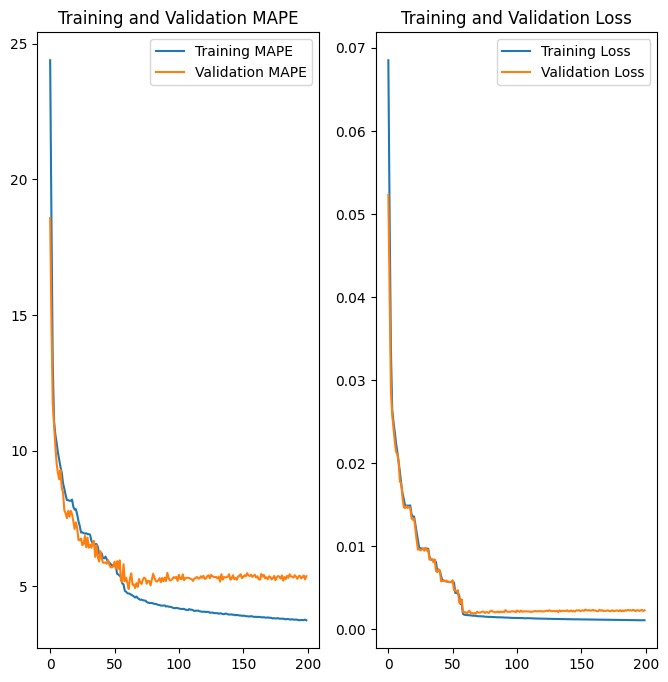

In [51]:
acc = history.history['mean_absolute_percentage_error']
val_acc = history.history['val_mean_absolute_percentage_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training MAPE')
plt.plot(epochs_range, val_acc, label='Validation MAPE')
plt.legend(loc='upper right')
plt.title('Training and Validation MAPE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
res=warangal_temp.evaluate(X_test,y_test)

12/12 [==============================] - 0s 18ms/step - loss: 0.0040 - mean_absolute_percentage_error: 8.2265


In [53]:
test_x=df[10958:11323]
display(test_x)
test_x=test_x.to_numpy()
test_x=test_x.reshape(1,365,2)
test_x

,temp_max,rainfall
Date,,
2021-01-01,0.5044,0.000000
2021-01-02,0.4830,0.000000
2021-01-03,0.5054,0.000000
2021-01-04,0.5112,0.000000
2021-01-05,0.5442,0.000000
...,...,...
2021-12-27,0.5432,0.000000
2021-12-28,0.5460,0.000343
2021-12-29,0.5528,0.000514


array([[[5.04400000e-01, 0.00000000e+00],
        [4.83000000e-01, 0.00000000e+00],
        [5.05400000e-01, 0.00000000e+00],
        [5.11200000e-01, 0.00000000e+00],
        [5.44200000e-01, 0.00000000e+00],
        [5.50200000e-01, 3.25714286e-03],
        [5.50000000e-01, 8.00000000e-04],
        [5.57200000e-01, 0.00000000e+00],
        [5.51600000e-01, 0.00000000e+00],
        [5.62200000e-01, 0.00000000e+00],
        [5.88000000e-01, 0.00000000e+00],
        [5.93400000e-01, 0.00000000e+00],
        [5.85000000e-01, 0.00000000e+00],
        [5.76200000e-01, 0.00000000e+00],
        [5.78000000e-01, 0.00000000e+00],
        [5.80600000e-01, 0.00000000e+00],
        [5.72400000e-01, 0.00000000e+00],
        [5.66600000e-01, 0.00000000e+00],
        [5.85400000e-01, 0.00000000e+00],
        [6.01600000e-01, 0.00000000e+00],
        [6.08400000e-01, 0.00000000e+00],
        [5.91800000e-01, 0.00000000e+00],
        [5.93800000e-01, 0.00000000e+00],
        [6.18000000e-01, 0.0000000

In [54]:
test_y=df['temp_max'][11323:]
test_y=test_y.to_numpy()
test_y

array([0.5492, 0.551 , 0.5476, 0.5502, 0.5482, 0.5576, 0.5646, 0.5636,
       0.5664, 0.5574, 0.5428, 0.546 , 0.5324, 0.5542, 0.5168, 0.5358,
       0.533 , 0.5502, 0.5416, 0.5668, 0.6046, 0.6134, 0.572 , 0.5368,
       0.5148, 0.5268, 0.5208, 0.52  , 0.538 , 0.5838, 0.6098, 0.6082,
       0.6288, 0.632 , 0.589 , 0.5906, 0.5974, 0.6194, 0.6176, 0.6136,
       0.6038, 0.5988, 0.6078, 0.6208, 0.6242, 0.6238, 0.6104, 0.6196,
       0.628 , 0.6436, 0.703 , 0.6876, 0.6872, 0.6784, 0.684 , 0.686 ,
       0.6794, 0.6786, 0.6852, 0.7034, 0.6974, 0.7038, 0.7058, 0.7112,
       0.7144, 0.7114, 0.7232, 0.7404, 0.73  , 0.7438, 0.6978, 0.7382,
       0.7596, 0.7772, 0.8152, 0.8288, 0.81  , 0.7836, 0.7976, 0.8124,
       0.8074, 0.8138, 0.8098, 0.8098, 0.8266, 0.8352, 0.8326, 0.8496,
       0.8464, 0.8488, 0.8396, 0.7804, 0.7916, 0.7832, 0.7788, 0.7938,
       0.7652, 0.7738, 0.783 , 0.7902, 0.8216, 0.822 , 0.8164, 0.807 ,
       0.8192, 0.747 , 0.7774, 0.792 , 0.8176, 0.7974, 0.8068, 0.763 ,
      

In [55]:
predictions2=warangal_temp.predict(test_x)

1/1 [==============================] - 0s 336ms/step


In [56]:
predictions2= predictions2.reshape(365)
predictions2= pd.DataFrame(data=predictions2, index=df[11323:].index)

In [57]:
predictions2.shape

(365, 1)

In [58]:
expected=pd.DataFrame(data=test_y, index=df[11323:].index, columns=["temp_max_actual"])

In [59]:
predictions2=predictions2*50
expected=expected*50

In [60]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

In [1]:
rmse= mse(expected, predictions2, squared=False)
print("RMSE: ",rmse)
mae1= mae(expected, predictions2)
print("MAE: ",mae1)
mape1= mape(expected, predictions2)
print("MAPE: {}%".format(mape1*100))

NameError: name 'mse' is not defined

In [62]:
prediction_low=predictions2-mae1
prediction_upper=predictions2+mae1

In [63]:
prediction_upper.columns=['upper bound temp']
prediction_low.columns=['lower bound temp']
predictions2.columns=['predicted temp']

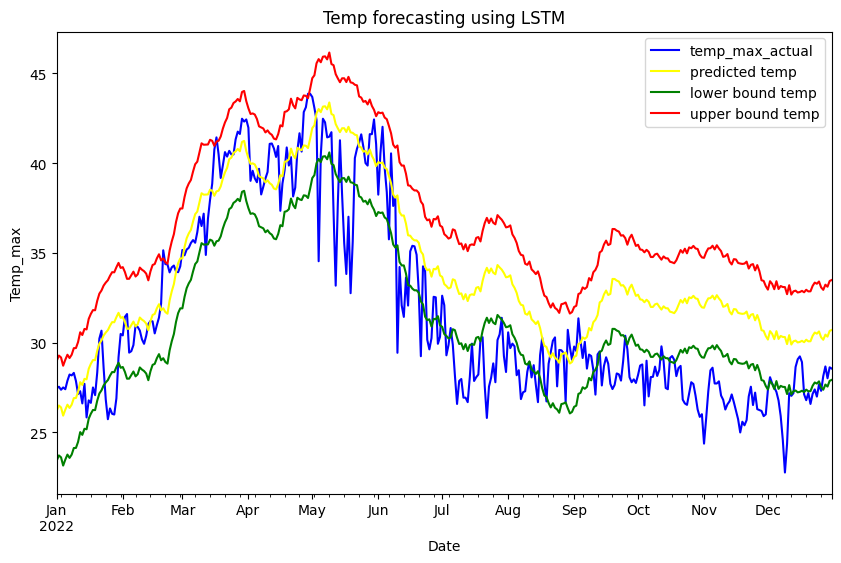

In [64]:
ax = expected.plot(
    figsize=(10, 6),
    color="blue",
    title="Temp forecasting using LSTM",
)
ax.set_ylabel("Temp_max")
ax.set_xlabel("Year")

predictions2.plot(ax=ax, color="yellow")     
prediction_low.plot(ax=ax, color="green")
prediction_upper.plot(ax=ax, color="red")
plt.show()

In [65]:
import pickle

In [66]:
pickle.dump(warangal_temp, open('C:\\Users\\Lenovo\\Desktop\\NASSCOM\\models\\warangal_heat_nasa.pkl', 'wb')) # Saving model in pickle file

INFO:tensorflow:Assets written to: ram://f9e62e78-48ff-4c81-ab22-97e4842cc35e/assets


INFO:tensorflow:Assets written to: ram://f9e62e78-48ff-4c81-ab22-97e4842cc35e/assets


In [2]:
from tensorflow import keras

In [68]:
warangal_temp.save("warangal_heat_nasa.h5", save_format='h5') # Saving the model in h5 format 

In [90]:
model = keras.models.load_model("warangal_heat_nasa.h5") # loading the model

In [91]:
test_x1=df[11323:]
display(test_x1)
test_x1=test_x1.to_numpy()
test_x1=test_x1.reshape(1,365,2)
test_x1

,temp_max,rainfall
Date,,
2022-01-01,0.5492,0.000000
2022-01-02,0.5510,0.000000
2022-01-03,0.5476,0.000000
2022-01-04,0.5502,0.000000
2022-01-05,0.5482,0.000000
...,...,...
2022-12-27,0.5628,0.005371
2022-12-28,0.5736,0.014571
2022-12-29,0.5604,0.000343


array([[[5.49200000e-01, 0.00000000e+00],
        [5.51000000e-01, 0.00000000e+00],
        [5.47600000e-01, 0.00000000e+00],
        [5.50200000e-01, 0.00000000e+00],
        [5.48200000e-01, 0.00000000e+00],
        [5.57600000e-01, 0.00000000e+00],
        [5.64600000e-01, 0.00000000e+00],
        [5.63600000e-01, 0.00000000e+00],
        [5.66400000e-01, 1.82857143e-03],
        [5.57400000e-01, 3.31428571e-02],
        [5.42800000e-01, 7.51428571e-02],
        [5.46000000e-01, 8.04000000e-02],
        [5.32400000e-01, 3.61142857e-02],
        [5.54200000e-01, 1.76000000e-02],
        [5.16800000e-01, 1.10857143e-02],
        [5.35800000e-01, 5.31428571e-03],
        [5.33000000e-01, 1.12571429e-02],
        [5.50200000e-01, 0.00000000e+00],
        [5.41600000e-01, 0.00000000e+00],
        [5.66800000e-01, 0.00000000e+00],
        [6.04600000e-01, 0.00000000e+00],
        [6.13400000e-01, 0.00000000e+00],
        [5.72000000e-01, 0.00000000e+00],
        [5.36800000e-01, 0.0000000

In [92]:
pred1= model.predict(test_x1)

1/1 [==============================] - 0s 264ms/step


In [93]:
pred1.shape

(1, 365)

In [94]:
pred1 = pred1.reshape(365)
pred2 = pd.DataFrame(data=pred1,index=df[11323:].index, columns=['temp_max'])
pred2["temp_max"] = pred2["temp_max"]*50 
pred2["date"]= pd.date_range(start='01-01-2023', end='31-12-2023')
pred2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16876\2431198317.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pred2["date"]= pd.date_range(start='01-01-2023', end='31-12-2023')


,temp_max,date
Date,,
2022-01-01,27.900856,2023-01-01
2022-01-02,27.703089,2023-01-02
2022-01-03,27.522797,2023-01-03
2022-01-04,27.070179,2023-01-04
2022-01-05,27.044699,2023-01-05
...,...,...
2022-12-27,31.478331,2023-12-27
2022-12-28,31.620506,2023-12-28
2022-12-29,31.519627,2023-12-29


In [95]:
pred4=pred2.copy()
pred4=pred4.set_index('date')
pred4.to_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Prediction\\warangal_prediction_temp.csv")

In [96]:
norm= pd.read_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Normals\\temp_normals.csv")
norm['Warangal'][0]

31.0

In [97]:
pred2= pred2.loc[(pred2['temp_max']>=40)]
pred2= pred2.sort_values(by=['date'])
pred2['month']=pred2['date'].dt.month
pred2['normal']=pred2['month'].astype(float)


In [98]:
pred2

,temp_max,date,month,normal
Date,,,,
2022-04-16,40.126007,2023-04-16,4,4.0
2022-04-18,40.424896,2023-04-18,4,4.0
2022-04-19,40.419327,2023-04-19,4,4.0
2022-04-20,40.202629,2023-04-20,4,4.0
2022-04-21,40.346630,2023-04-21,4,4.0
2022-04-26,40.009548,2023-04-26,4,4.0
2022-05-03,40.176071,2023-05-03,5,5.0
2022-05-04,40.180954,2023-05-04,5,5.0
2022-05-05,40.011024,2023-05-05,5,5.0


In [99]:
for i in range(len(pred2['temp_max'])):
    pred2['normal'][i] = float(norm['Warangal'][int(pred2["month"][i])-1]) 
pred2

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16876\2698921670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred2['normal'][i] = float(norm['Warangal'][int(pred2["month"][i])-1])


,temp_max,date,month,normal
Date,,,,
2022-04-16,40.126007,2023-04-16,4,39.1
2022-04-18,40.424896,2023-04-18,4,39.1
2022-04-19,40.419327,2023-04-19,4,39.1
2022-04-20,40.202629,2023-04-20,4,39.1
2022-04-21,40.346630,2023-04-21,4,39.1
2022-04-26,40.009548,2023-04-26,4,39.1
2022-05-03,40.176071,2023-05-03,5,40.7
2022-05-04,40.180954,2023-05-04,5,40.7
2022-05-05,40.011024,2023-05-05,5,40.7


In [100]:
pred2["diff"]= pred2['temp_max']-pred2['normal']
pred2

,temp_max,date,month,normal,diff
Date,,,,,
2022-04-16,40.126007,2023-04-16,4,39.1,1.026007
2022-04-18,40.424896,2023-04-18,4,39.1,1.324896
2022-04-19,40.419327,2023-04-19,4,39.1,1.319327
2022-04-20,40.202629,2023-04-20,4,39.1,1.102629
2022-04-21,40.346630,2023-04-21,4,39.1,1.246630
2022-04-26,40.009548,2023-04-26,4,39.1,0.909548
2022-05-03,40.176071,2023-05-03,5,40.7,-0.523929
2022-05-04,40.180954,2023-05-04,5,40.7,-0.519046
2022-05-05,40.011024,2023-05-05,5,40.7,-0.688976


In [101]:
pred3=pred2.loc[((pred2['normal']<=40) & (pred2['diff']>=5)) | ((pred2['normal']>=40) & (pred2['diff']>=4)) | (pred2['temp_max']>=45)]
pred3["heat"]=(pred3["temp_max"]).astype(str)
pred3

,temp_max,date,month,normal,diff,heat
Date,,,,,,


In [88]:
for i in range(len(pred3['temp_max'])):
    if (((pred3['normal'][i]<=40) & (pred2['diff'][i]<7)) | ((pred2['normal'][i]>40) & (pred2['diff'][i]<6))):
        pred3['heat'][i]='Warning! Heatwave expected'
    elif (((pred3['normal'][i]<=40) & (pred2['diff'][i]>=7)) | ((pred2['normal'][i]>40) & (pred2['diff'][i]>=6)) | (pred2['temp_max']>=45)):
        pred3['heat'][i]='Warning! Severe Heatwave expected'

In [ ]:
pred3=pred3.set_index('date')
pred3=pred3.drop(['month', 'normal', 'diff'], axis=1)
pred3 # final dataframe containing prediction of heatwaves for Warangal district

In [102]:
pred3=pred3.set_index('date')
pred3=pred3.drop(['month', 'normal', 'diff'], axis=1)
pred3
pred3.to_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Prediction\\warangal_heatwave_prediction.csv") # Writing the final dataframe to A CSV FILE

In [72]:
pred2= pred2.reshape(365)
pred2= pd.DataFrame(data=pred2, index=df[11323:].index)
pred2=pred2*50

In [74]:
rmse= mse(expected, pred2, squared=False)
print(rmse)
mae1= mae(expected, pred2)
print(mae1)
mape1= mape(expected, pred2)
print("{}%".format(mape1*100))

3.4447669528577136
2.7816223182155664
9.558870072347165%
